# GX_05

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def two_f_system(field):
    """
        Takes an electrical field one focal length in front of the lens.
        Returns the electrical field one focal length behind the lens.
    """
    return np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(field)))

# 1. Coherent vs Incoherent Imaging

Use the function `two_f_system` to propagate the electrical field `target.npy` through one lens.
In Fourier space multiply dark field aperture. 
The outer radius of the aperture is `20µm` and the inner radius is `3µm`.
The wavelength is `633nm` and the size of the Siemens star field is `200µm`.
The focal length is `631.9mm`


## 1 Propagate coherently through the optical system.
## 2 Propagate incoherently through the optical system.
## 3 Explain the differences in the results.
## 4 Why don't we need the focal length for the simulation? But why is it still important to know?
Recall what a lens really does to the electrical field. Is it only a *Fourier transform*?

In [5]:
target = np.load("usaf.npy")

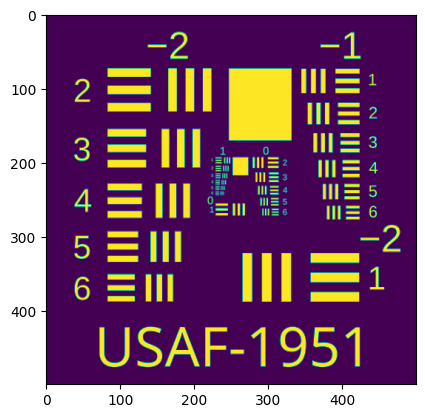

In [6]:
plt.imshow(target)

In [7]:
outer_radius = 20e-6
inner_radius = 3e-6
wvl = 633e-9
focal_length = 200e-6
target_size = 200e-6


## 1

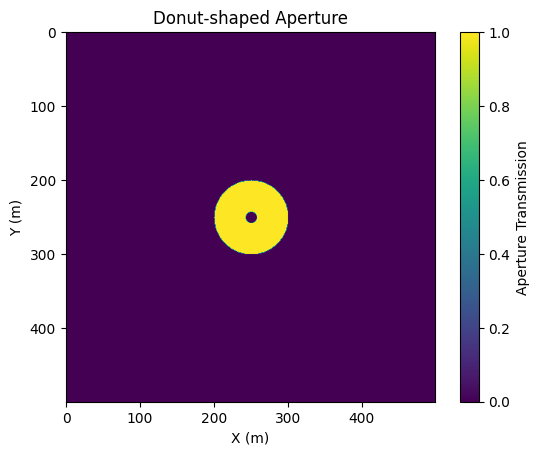

In [8]:
dx = target_size / target.shape[0]
N = 500
z = 40e-6

x = np.linspace(-N / 2 * dx, N / 2  * dx, N, endpoint=False)
y = x
X, Y = np.meshgrid(x,y)

U0 = np.ones((N, N))

aperture = ((X**2 + Y**2 >= inner_radius**2) & (X**2 + Y**2 <= outer_radius**2))
plt.imshow(aperture)
plt.title("Donut-shaped Aperture")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.colorbar(label="Aperture Transmission")
plt.show()



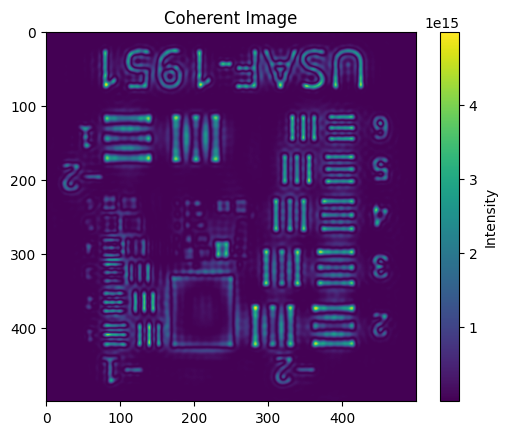

In [9]:
U1 = two_f_system(target*U0) # after first lens
U2 = U1 * aperture #  multiply by aperture
U3 = two_f_system(U2) # after second lens

plt.imshow(np.abs(U3)**2)
plt.title("Coherent Image")
plt.colorbar(label="Intensity")
plt.show()

# 2

In [10]:

def simulate_incoherent_image(target, aperture, M=100):
    intensity = np.zeros_like(target, dtype=np.float64)

    for _ in range(M):
        random_phase = np.exp(1j * 2 * np.pi * np.random.rand(*target.shape))
        U0 = random_phase
        
        U1 = two_f_system(target * U0)
        U2 = U1 * aperture
        U3 = two_f_system(U2)

        intensity += np.abs(U3)**2

    # Average over M realizations
    return intensity / M


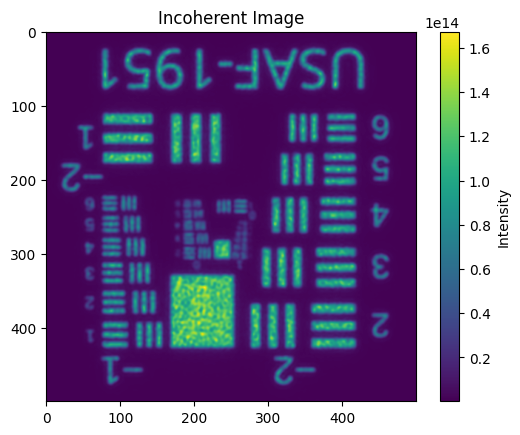

In [11]:


image = simulate_incoherent_image(target, aperture)
plt.imshow(image)
plt.title("Incoherent Image")
plt.colorbar(label="Intensity")
plt.show()


# 3


As we saw in class, using incoherent imaging leads to more details in the output field. The edges are a bit more blurry compared to the coherent one but the overall result is better as the intensity is more distributed, allowing to view more features. In the coherent image, we can see the results of constructive interferences happening in between the objects of the original image.

This happens because the coherent light is prone to interference patterns whereas incoherent light averages random phase distribution, blurring a bit the image but ensuring a more noise-robust image

# 4



Depending on the position of the input and output fields and its characheristics, the lens can perform a fourier transform or not. However it always adds a quadratic phase term, which helps to focus an parallel incoming field to its back focal plane.

Here in the simulation we don't need to explicitely specify the focal lens (assuming both lens are pefect and identical) because we are not working with a real-world system so the FFT perfectly replicates the effect of the lens. However it's still useful to know to compare to actual experiemtns to validate our simulation